In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
National_data_2013 = 'Raw_Data_National/National_Data_2013.xlsx'
National_data_2014 = 'Raw_Data_National/National_Data_2014.xlsx'
National_data_2015=  'Raw_Data_National/National_Data_2015.xlsx'
National_data_2016 = 'Raw_Data_National/National_Data_2016.xlsx'
National_data_2017 = 'Raw_Data_National/National_Data_2017.xlsx'
state_data_2013 = 'Raw_Data_State/State_data_2013.xlsx'
state_data_2014 = 'Raw_Data_State/State_data_2014.xlsx'
state_data_2015=  'Raw_Data_State/State_data_2015.xlsx'
state_data_2016 = 'Raw_Data_State/State_data_2016.xlsx'
state_data_2017 = 'Raw_Data_State/State_data_2017.xlsx'
predict = 'Tenyear_prediction.xlsx'
income_csv= "Raw_Data_City/2016_city_income.csv"
income_df = pd.read_csv(income_csv)
pop_csv = "Raw_Data_City/city_population_data.csv"
pop_df= pd.read_csv(pop_csv)
datajob_csv= "Raw_Data_City/City_data_2016.csv"
datajob= pd.read_csv(datajob_csv)
data_csv = "Raw_Data_City/All_City_Data.csv"
data= pd.read_csv(data_csv)
data.head()

ID                              City  Job Wage (Avg)  Number of Jobs  \
0  10500                        Albany, GA     66783.33333             320   
1  11180                          Ames, IA     69296.66667             600   
2  31080     Anaheim-Santa Ana-Irvine, CA      91886.25000           35420   
3  11260                     Anchorage, AK     84437.14286            1840   
4  11500  Anniston-Oxford-Jacksonville, AL     59123.33333             140   

   Population  Household Income (Avg)  
0      152440                   57901  
1       96816                   70682  
2    13328261                   95358  
3      401499                  102233  
4      114980                   58992

In [3]:
National_2013_df = pd.read_excel(National_data_2013)
National_2014_df = pd.read_excel(National_data_2014)
National_2015_df = pd.read_excel(National_data_2015)
National_2016_df = pd.read_excel(National_data_2016)
National_2017_df = pd.read_excel(National_data_2017)
state_2013_df = pd.read_excel(state_data_2013)
state_2014_df = pd.read_excel(state_data_2014)
state_2015_df = pd.read_excel(state_data_2015)
state_2016_df = pd.read_excel(state_data_2016)
state_2017_df = pd.read_excel(state_data_2017)
predicts = pd.read_excel(predict)

In [4]:
National_2013_copy_df = National_2013_df.dropna(axis=1, how='all')
National_2014_copy_df = National_2014_df.dropna(axis=1, how='all')
National_2015_copy_df = National_2015_df.dropna(axis=1, how='all')
National_2016_copy_df = National_2016_df.dropna(axis=1, how='all')
National_2017_copy_df = National_2017_df.dropna(axis=1, how='all')
state_2013_copy_df = state_2013_df.dropna(axis=1, how='all')
state_2014_copy_df = state_2014_df.dropna(axis=1, how='all')
state_2015_copy_df = state_2015_df.dropna(axis=1, how='all')
state_2016_copy_df = state_2016_df.dropna(axis=1, how='all')
state_2017_copy_df = state_2017_df.dropna(axis=1, how='all')
predict_df = predicts.dropna(axis=1, how='all')

In [5]:
tot_emp_2017 = National_2017_copy_df["TOT_EMP"].sum()
tot_emp_2016 = National_2016_copy_df["TOT_EMP"].sum()
tot_emp_2015 = National_2015_copy_df["TOT_EMP"].sum()
tot_emp_2014 = National_2014_copy_df["TOT_EMP"].sum()
tot_emp_2013 = National_2013_copy_df["TOT_EMP"].sum()
total_emp_year = [tot_emp_2017,tot_emp_2016,tot_emp_2015,tot_emp_2014,tot_emp_2013]

annual_average_2017 = National_2017_copy_df["A_MEAN"].mean()
annaul_average_2016 = National_2016_copy_df["A_MEAN"].mean()
annual_average_2015 = National_2015_copy_df["A_MEAN"].mean()
annual_average_2014 = National_2014_copy_df["A_MEAN"].mean()
annaul_average_2013 = National_2013_copy_df["A_MEAN"].mean()
annual_average_pay = [annual_average_2017,annaul_average_2016,annual_average_2015,annual_average_2014,annaul_average_2013]


hourly_average_2017 = National_2017_copy_df["H_MEAN"].mean()
hourly_average_2016 = National_2016_copy_df["H_MEAN"].mean()
hourly_average_2015 = National_2015_copy_df["H_MEAN"].mean()
hourly_average_2014 = National_2014_copy_df["H_MEAN"].mean()
hourly_average_2013 = National_2013_copy_df["H_MEAN"].mean()
hourly_average_pay = [hourly_average_2017,hourly_average_2016,hourly_average_2015,hourly_average_2014,hourly_average_2013]

hourly_10p_2017 = National_2017_copy_df["H_PCT10"].mean()
hourly_10p_2016 = National_2016_copy_df["H_PCT10"].mean()
hourly_10p_2015 = National_2015_copy_df["H_PCT10"].mean()
hourly_10p_2014 = National_2014_copy_df["H_PCT10"].mean()
hourly_10p_2013 = National_2013_copy_df["H_PCT10"].mean()
hourly_10p_pay = [hourly_10p_2017,hourly_10p_2016,hourly_10p_2015,hourly_10p_2014,hourly_10p_2013]

annual_10p_2017 = National_2017_copy_df["A_PCT10"].mean()
annual_10p_2016 = National_2016_copy_df["A_PCT10"].mean()
annual_10p_2015 = National_2015_copy_df["A_PCT10"].mean()
annual_10p_2014 = National_2014_copy_df["A_PCT10"].mean()
annual_10p_2013 = National_2013_copy_df["A_PCT10"].mean()
annual_10p_pay = [annual_10p_2017,annual_10p_2016,annual_10p_2015,annual_10p_2014,annual_10p_2013]

hourly_25p_2017 = National_2017_copy_df["H_PCT25"].mean()
hourly_25p_2016 = National_2016_copy_df["H_PCT25"].mean()
hourly_25p_2015 = National_2015_copy_df["H_PCT25"].mean()
hourly_25p_2014 = National_2014_copy_df["H_PCT25"].mean()
hourly_25p_2013 = National_2013_copy_df["H_PCT25"].mean()
hourly_25p_pay = [hourly_25p_2017,hourly_25p_2016,hourly_25p_2015,hourly_25p_2014,hourly_25p_2013]
annual_25p_2017 = National_2017_copy_df["A_PCT25"].mean()
annual_25p_2016 = National_2016_copy_df["A_PCT25"].mean()
annual_25p_2015 = National_2015_copy_df["A_PCT25"].mean()
annual_25p_2014 = National_2014_copy_df["A_PCT25"].mean()
annual_25p_2013 = National_2013_copy_df["A_PCT25"].mean()
annual_25p_pay = [annual_25p_2017,annual_25p_2016,annual_25p_2015,annual_25p_2014,annual_25p_2013]


hourly_50p_2017 = National_2017_copy_df["H_MEDIAN"].mean()
hourly_50p_2016 = National_2016_copy_df["H_MEDIAN"].mean()
hourly_50p_2015 = National_2015_copy_df["H_MEDIAN"].mean()
hourly_50p_2014 = National_2014_copy_df["H_MEDIAN"].mean()
hourly_50p_2013 = National_2013_copy_df["H_MEDIAN"].mean()
hourly_50p_pay = [hourly_50p_2017,hourly_50p_2016,hourly_50p_2015,hourly_50p_2014,hourly_50p_2013]
annual_50p_2017 = National_2017_copy_df["A_MEDIAN"].mean()
annual_50p_2016 = National_2016_copy_df["A_MEDIAN"].mean()
annual_50p_2015 = National_2015_copy_df["A_MEDIAN"].mean()
annual_50p_2014 = National_2014_copy_df["A_MEDIAN"].mean()
annual_50p_2013 = National_2013_copy_df["A_MEDIAN"].mean()
annual_50p_pay = [annual_50p_2017,annual_50p_2016,annual_50p_2015,annual_50p_2014,annual_50p_2013]


hourly_75p_2017 = National_2017_copy_df["H_PCT75"].mean()
hourly_75p_2016 = National_2016_copy_df["H_PCT75"].mean()
hourly_75p_2015 = National_2015_copy_df["H_PCT75"].mean()
hourly_75p_2014 = National_2014_copy_df["H_PCT75"].mean()
hourly_75p_2013 = National_2013_copy_df["H_PCT75"].mean()
hourly_75p_pay = [hourly_75p_2017,hourly_75p_2016,hourly_75p_2015,hourly_75p_2014,hourly_75p_2013]
annual_75p_2017 = National_2017_copy_df["A_PCT75"].mean()
annual_75p_2016 = National_2016_copy_df["A_PCT75"].mean()
annual_75p_2015 = National_2015_copy_df["A_PCT75"].mean()
annual_75p_2014 = National_2014_copy_df["A_PCT75"].mean()
annual_75p_2013 = National_2013_copy_df["A_PCT75"].mean()
annual_75p_pay = [annual_75p_2017,annual_75p_2016,annual_75p_2015,annual_75p_2014,annual_75p_2013]

In [6]:
Nat_data_df= pd.DataFrame({"Total_emp_year":total_emp_year,"Year":["2017","2016","2015","2014","2013"],
                          "Annual pay":annual_average_pay,"Hourlypay":hourly_average_pay,
                           "Hourly_10th_percentile":hourly_10p_pay,"Hourly_25th_percentile":hourly_25p_pay,
                          "Hourly_Median":hourly_50p_pay,"Hourly_75th_percentile":hourly_75p_pay,
                          "Annaul_10th_percentile":annual_10p_pay,"Annual_25th_percentile":annual_25p_pay,
                          "Annual_Median":annual_50p_pay,"Annual_75th_percentile":annual_75p_pay},
                         columns = ["Year","Total_emp_year","Annual pay","Hourlypay","Hourly_10th_percentile",
                                   "Hourly_25th_percentile","Hourly_Median","Hourly_75th_percentile","Annaul_10th_percentile",
                                  "Annual_25th_percentile","Annual_Median","Annual_75th_percentile"])

Nat_data_df.style.format({"Annual pay":"${:,.2f}","Hourlypay":"${:,.2f}","Hourly_10th_percentile":"${:,.2f}",
                                   "Hourly_25th_percentile":"${:,.2f}","Hourly_Median":"${:,.2f}","Hourly_75th_percentile":"${:,.2f}","Annaul_10th_percentile":"${:,.2f}",
                                  "Annual_25th_percentile":"${:,.2f}","Annual_Median":"${:,.2f}","Annual_75th_percentile":"${:,.2f}"})

In [7]:
state_2013_copy_df = state_2013_copy_df.convert_objects(convert_numeric=True)
state_2014_copy_df = state_2014_copy_df.convert_objects(convert_numeric=True)
state_2015_copy_df = state_2015_copy_df.convert_objects(convert_numeric=True)
state_2016_copy_df = state_2016_copy_df.convert_objects(convert_numeric=True)
state_2017_copy_df = state_2017_copy_df.convert_objects(convert_numeric=True)

state_2013_gorup_df = state_2013_copy_df.groupby("ST")
state_2014_gorup_df = state_2013_copy_df.groupby("ST")
state_2015_gorup_df = state_2013_copy_df.groupby("ST")
state_2016_gorup_df = state_2013_copy_df.groupby("ST")
state_2017_gorup_df = state_2013_copy_df.groupby("ST")
State = state_2013_copy_df["STATE"].unique()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

In [8]:
National_2013_copy_df.fillna(0)
National_2014_copy_df.fillna(0)
National_2015_copy_df.fillna(0)
National_2016_copy_df.fillna(0)
National_2017_copy_df.fillna(0)
predict_df.fillna(0)

2016 National Employment Matrix title     Code Occupation type  2016_number  \
0                   Management analysts  13-1111       Line item        806.4   
1                       Budget analysts  13-2031       Line item         58.4   
2                       Credit analysts  13-2041       Line item         73.8   
3                    Financial analysts  13-2051       Line item        296.1   
4             Computer systems analysts  15-1121       Line item        600.5   
5         Information security analysts  15-1122       Line item        100.0   
6          Operations research analysts  15-2031       Line item        114.0   
7               Broadcast news analysts  27-3021       Line item          5.7   

   2026_number  2016_percentage  2026_percentage  Change_Number  \
0        921.6              0.5              0.5          115.2   
1         62.2              0.0              0.0            3.8   
2         79.9              0.0              0.0            6.2   
3        328.2              0.2              0.2           32.2   
4        654.9              0.4              0.4           54.4   
5        128.5              0.1              0.1           28.5   
6        145.3              0.1              0.1           31.3   
7          5.6              0.0              0.0            0.0   

   change_Percent  Occupational openings, projected 2016-26 annual average  
0            14.3                                               83.9        
1             6.5                                                4.8        
2             8.4                                                6.8        
3            10.9                                               29.0        
4             9.1                                               44.9        
5            28.5                                               10.4        
6            27.4                                               10.7        
7            -0.4                                                0.5

In [9]:
state_total_emp_2013 = list(state_2013_gorup_df["TOT_EMP"].sum())
state_total_emp_2014 = list(state_2014_gorup_df["TOT_EMP"].sum())
state_total_emp_2015 = list(state_2015_gorup_df["TOT_EMP"].sum())
state_total_emp_2016 = list(state_2016_gorup_df["TOT_EMP"].sum())
state_total_emp_2017 = list(state_2017_gorup_df["TOT_EMP"].sum())



state_annual_average_2013 = list(state_2013_gorup_df["A_MEAN"].mean())
state_annual_average_2014 = list(state_2014_gorup_df["A_MEAN"].mean())
state_annual_average_2015 = list(state_2015_gorup_df["A_MEAN"].mean())
state_annual_average_2016 = list(state_2016_gorup_df["A_MEAN"].mean())
state_annual_average_2017 = list(state_2017_gorup_df["A_MEAN"].mean())


state_hour_average_2013 = list(state_2013_gorup_df["H_MEAN"].mean())
state_hour_average_2014 = list(state_2014_gorup_df["H_MEAN"].mean())
state_hour_average_2015 = list(state_2015_gorup_df["H_MEAN"].mean())
state_hour_average_2016 = list(state_2016_gorup_df["H_MEAN"].mean())
state_hour_average_2017 = list(state_2017_gorup_df["H_MEAN"].mean())

state_Hpct10_average_2013 = list(state_2013_gorup_df["H_PCT10"].mean())
state_Hpct10_average_2014 = list(state_2014_gorup_df["H_PCT10"].mean())
state_Hpct10_average_2015 = list(state_2015_gorup_df["H_PCT10"].mean())
state_Hpct10_average_2016 = list(state_2016_gorup_df["H_PCT10"].mean())
state_Hpct10_average_2017 = list(state_2017_gorup_df["H_PCT10"].mean())


state_Hpct25_average_2013 = list(state_2013_gorup_df["H_PCT25"].mean())
state_Hpct25_average_2014 = list(state_2014_gorup_df["H_PCT25"].mean())
state_Hpct25_average_2015 = list(state_2015_gorup_df["H_PCT25"].mean())
state_Hpct25_average_2016 = list(state_2016_gorup_df["H_PCT25"].mean())
state_Hpct25_average_2017 = list(state_2017_gorup_df["H_PCT25"].mean())

state_Hmedian_average_2013 = list(state_2013_gorup_df["H_MEDIAN"].mean())
state_Hmedian_average_2014 = list(state_2014_gorup_df["H_MEDIAN"].mean())
state_Hmedian_average_2015 = list(state_2015_gorup_df["H_MEDIAN"].mean())
state_Hmedian_average_2016 = list(state_2016_gorup_df["H_MEDIAN"].mean())
state_Hmedian_average_2017 = list(state_2017_gorup_df["H_MEDIAN"].mean())

state_Hpct75_average_2013 = list(state_2013_gorup_df["H_PCT75"].mean())
state_Hpct75_average_2014 = list(state_2014_gorup_df["H_PCT75"].mean())
state_Hpct75_average_2015 = list(state_2015_gorup_df["H_PCT75"].mean())
state_Hpct75_average_2016 = list(state_2016_gorup_df["H_PCT75"].mean())
state_Hpct75_average_2017 = list(state_2017_gorup_df["H_PCT75"].mean())

state_Hpct90_average_2013 = list(state_2013_gorup_df["H_PCT90"].mean())
state_Hpct90_average_2014 = list(state_2014_gorup_df["H_PCT90"].mean())
state_Hpct90_average_2015 = list(state_2015_gorup_df["H_PCT90"].mean())
state_Hpct90_average_2016 = list(state_2016_gorup_df["H_PCT90"].mean())
state_Hpct90_average_2017 = list(state_2017_gorup_df["H_PCT90"].mean())


state_Apct10_average_2013 = list(state_2013_gorup_df["A_PCT10"].mean())
state_Apct10_average_2014 = list(state_2014_gorup_df["A_PCT10"].mean())
state_Apct10_average_2015 = list(state_2015_gorup_df["A_PCT10"].mean())
state_Apct10_average_2016 = list(state_2016_gorup_df["A_PCT10"].mean())
state_Apct10_average_2017 = list(state_2017_gorup_df["A_PCT10"].mean())


state_Apct25_average_2013 = list(state_2013_gorup_df["A_PCT25"].mean())
state_Apct25_average_2014 = list(state_2014_gorup_df["A_PCT25"].mean())
state_Apct25_average_2015 = list(state_2015_gorup_df["A_PCT25"].mean())
state_Apct25_average_2016 = list(state_2016_gorup_df["A_PCT25"].mean())
state_Apct25_average_2017 = list(state_2017_gorup_df["A_PCT25"].mean())

state_Amedian_average_2013 = list(state_2013_gorup_df["A_MEDIAN"].mean())
state_Amedian_average_2014 = list(state_2014_gorup_df["A_MEDIAN"].mean())
state_Amedian_average_2015 = list(state_2015_gorup_df["A_MEDIAN"].mean())
state_Amedian_average_2016 = list(state_2016_gorup_df["A_MEDIAN"].mean())
state_Amedian_average_2017 = list(state_2017_gorup_df["A_MEDIAN"].mean())

state_Apct75_average_2013 = list(state_2013_gorup_df["A_PCT75"].mean())
state_Apct75_average_2014 = list(state_2014_gorup_df["A_PCT75"].mean())
state_Apct75_average_2015 = list(state_2015_gorup_df["A_PCT75"].mean())
state_Apct75_average_2016 = list(state_2016_gorup_df["A_PCT75"].mean())
state_Apct75_average_2017 = list(state_2017_gorup_df["A_PCT75"].mean())

state_Apct90_average_2013 = list(state_2013_gorup_df["A_PCT90"].mean())
state_Apct90_average_2014 = list(state_2014_gorup_df["A_PCT90"].mean())
state_Apct90_average_2015 = list(state_2015_gorup_df["A_PCT90"].mean())
state_Apct90_average_2016 = list(state_2016_gorup_df["A_PCT90"].mean())
state_Apct90_average_2017 = list(state_2017_gorup_df["A_PCT90"].mean())

In [10]:
state_emp_df = pd.DataFrame({"State":State,"Tot emp_2013":state_total_emp_2013,"Tot emp_2014":state_total_emp_2014,
                            "Tot emp_2015":state_total_emp_2015,"Tot emp_2016":state_total_emp_2016,
                            "Tot emp_2017":state_total_emp_2017})
state_emp_df.head()

State  Tot emp_2013  Tot emp_2014  Tot emp_2015  Tot emp_2016  \
0     Alabama        2240.0        2240.0        2240.0        2240.0   
1      Alaska       17790.0       17790.0       17790.0       17790.0   
2     Arizona       10220.0       10220.0       10220.0       10220.0   
3    Arkansas       38790.0       38790.0       38790.0       38790.0   
4  California      270880.0      270880.0      270880.0      270880.0   

   Tot emp_2017  
0        2240.0  
1       17790.0  
2       10220.0  
3       38790.0  
4      270880.0

In [11]:
state_annual_avg_df = pd.DataFrame({"State":State,"Hour_Pay_2013":state_hour_average_2013,
                                    "Hour_Pay_2014":state_hour_average_2014,
                                   "Hour_Pay_2015":state_hour_average_2015,
                                   "Hour_Pay_2016":state_hour_average_2016,
                                   "Hour_Pay_2017":state_hour_average_2017})

In [12]:
state_annual_avg_df = pd.DataFrame({"State":State,"Average Pay_2013":state_annual_average_2013,
                                    "Average Pay_2014":state_annual_average_2014,
                                   "Average Pay_2015":state_annual_average_2015,
                                   "Average Pay_2016":state_annual_average_2016,
                                   "Average Pay_2017":state_annual_average_2017})

In [13]:
state_hour_pct25_df = pd.DataFrame({"State":State,"25th pct_hour_wage_2013":state_Hpct25_average_2013,
                                    "25th pct_hour_wage_2014":state_Hpct25_average_2014,
                                   "25th pct_hour_wage_2015":state_Hpct25_average_2015,
                                   "25th pct_hour_wage_2016":state_Hpct25_average_2016,
                                   "25th pct_hour_wage_2017":state_Hpct25_average_2017})

In [14]:
state_hour_median_df = pd.DataFrame({"State":State,"median_hour_wage_2013":state_Hmedian_average_2013,
                                    "median_hour_wage_2014":state_Hmedian_average_2014,
                                   "median_hour_wage_2015":state_Hmedian_average_2015,
                                   "median_hour_wage_2016":state_Hmedian_average_2016,
                                   "meadian_hour_wage_2017":state_Hmedian_average_2017})

In [15]:
tot_emp_2017 = National_2017_copy_df["TOT_EMP"].sum()
tot_emp_2016 = National_2016_copy_df["TOT_EMP"].sum()
tot_emp_2015 = National_2015_copy_df["TOT_EMP"].sum()
tot_emp_2014 = National_2014_copy_df["TOT_EMP"].sum()
tot_emp_2013 = National_2013_copy_df["TOT_EMP"].sum()
total_emp_year = [tot_emp_2017,tot_emp_2016,tot_emp_2015,tot_emp_2014,tot_emp_2013]

In [16]:
hour_mean_2017 = National_2017_copy_df["H_MEAN"].mean()
hour_mean_2016 = National_2016_copy_df["H_MEAN"].mean()
hour_mean_2015 = National_2015_copy_df["H_MEAN"].mean()
hour_mean_2014 = National_2014_copy_df["H_MEAN"].mean()
hour_mean_2013 = National_2013_copy_df["H_MEAN"].mean()
hourlypay_mean_year = [hour_mean_2017,hour_mean_2016,hour_mean_2015,hour_mean_2014,hour_mean_2013]

In [17]:
hourpct10_mean_2017 = National_2017_copy_df["H_PCT10"].mean()
hourpct10_mean_2016 = National_2016_copy_df["H_PCT10"].mean()
hourpct10_mean_2015 = National_2015_copy_df["H_PCT10"].mean()
hourpct10_mean_2014 = National_2014_copy_df["H_PCT10"].mean()
hourpct10_mean_2013 = National_2013_copy_df["H_PCT10"].mean()
hourpct10_mean_year = [hourpct10_mean_2017,hourpct10_mean_2016,hourpct10_mean_2015,hourpct10_mean_2014,hourpct10_mean_2013]

In [18]:
hourpct25_mean_2017 = National_2017_copy_df["H_PCT25"].mean()
hourpct25_mean_2016 = National_2016_copy_df["H_PCT25"].mean()
hourpct25_mean_2015 = National_2015_copy_df["H_PCT25"].mean()
hourpct25_mean_2014 = National_2014_copy_df["H_PCT25"].mean()
hourpct25_mean_2013 = National_2013_copy_df["H_PCT25"].mean()
hourpct25_mean_year = [hourpct25_mean_2017,hourpct25_mean_2016,hourpct25_mean_2015,hourpct25_mean_2014,hourpct25_mean_2013]


In [19]:
hourpct75_mean_2017 = National_2017_copy_df["H_PCT75"].mean()
hourpct75_mean_2016 = National_2016_copy_df["H_PCT75"].mean()
hourpct75_mean_2015 = National_2015_copy_df["H_PCT75"].mean()
hourpct75_mean_2014 = National_2014_copy_df["H_PCT75"].mean()
hourpct75_mean_2013 = National_2013_copy_df["H_PCT75"].mean()
hourpct75_mean_year = [hourpct75_mean_2017,hourpct75_mean_2016,hourpct75_mean_2015,hourpct75_mean_2014,hourpct75_mean_2013]


In [20]:
# hourpct90_mean_2017 = National_2017_copy_df["H_PCT90"].mean()
# hourpct90_mean_2016 = National_2016_copy_df["H_PCT90"].mean()
# hourpct90_mean_2015 = National_2015_copy_df["H_PCT90"].mean()
# hourpct90_mean_2014 = National_2014_copy_df["H_PCT90"].mean()
# hourpct90_mean_2013 = National_2013_copy_df["H_PCT90"].mean()
# hourpct90_mean_year = [hourpct90_mean_2017,hourpct90_mean_2016,hourpct90_mean_2015,hourpct90_mean_2014,hourpct90_mean_2013]


In [21]:
annual_mean_2017 = National_2017_copy_df["A_MEAN"].mean()
annual_mean_2016 = National_2016_copy_df["A_MEAN"].mean()
annual_mean_2015 = National_2015_copy_df["A_MEAN"].mean()
annual_mean_2014 = National_2014_copy_df["A_MEAN"].mean()
annual_mean_2013 = National_2013_copy_df["A_MEAN"].mean()
annualpay_mean_year = [annual_mean_2017,annual_mean_2016,annual_mean_2015,annual_mean_2014,annual_mean_2013]

In [22]:
annualpct10_mean_2017 = National_2017_copy_df["A_PCT10"].mean()
annualpct10_mean_2016 = National_2016_copy_df["A_PCT10"].mean()
annualpct10_mean_2015 = National_2015_copy_df["A_PCT10"].mean()
annualpct10_mean_2014 = National_2014_copy_df["A_PCT10"].mean()
annualpct10_mean_2013 = National_2013_copy_df["A_PCT10"].mean()
annualpct10_mean_year = [annualpct10_mean_2017,annualpct10_mean_2016,annualpct10_mean_2015,annualpct10_mean_2014,annualpct10_mean_2013]

In [23]:
annualpct10_mean_2017 = National_2017_copy_df["A_PCT10"].mean()
annualpct10_mean_2016 = National_2016_copy_df["A_PCT10"].mean()
annualpct10_mean_2015 = National_2015_copy_df["A_PCT10"].mean()
annualpct10_mean_2014 = National_2014_copy_df["A_PCT10"].mean()
annualpct10_mean_2013 = National_2013_copy_df["A_PCT10"].mean()
annualpct10_mean_year = [hourpct10_mean_2017,hourpct10_mean_2016,hourpct10_mean_2015,hourpct10_mean_2014,hourpct10_mean_2013]

In [24]:
annualpct25_mean_2017 = National_2017_copy_df["A_PCT25"].mean()
annualpct25_mean_2016 = National_2016_copy_df["A_PCT25"].mean()
annualpct25_mean_2015 = National_2015_copy_df["A_PCT25"].mean()
annualpct25_mean_2014 = National_2014_copy_df["A_PCT25"].mean()
annualpct25_mean_2013 = National_2013_copy_df["A_PCT25"].mean()
annualpct25_mean_year = [annualpct10_mean_2017,annualpct10_mean_2016,annualpct10_mean_2015,annualpct10_mean_2014,annualpct10_mean_2013]

In [25]:
annualpct75_mean_2017 = National_2017_copy_df["A_PCT75"].mean()
annualpct75_mean_2016 = National_2016_copy_df["A_PCT75"].mean()
annualpct75_mean_2015 = National_2015_copy_df["A_PCT75"].mean()
annualpct75_mean_2014 = National_2014_copy_df["A_PCT75"].mean()
annualpct75_mean_2013 = National_2013_copy_df["A_PCT75"].mean()
annualpct75_mean_year = [annualpct75_mean_2017,annualpct75_mean_2016,annualpct75_mean_2015,annualpct75_mean_2014,annualpct75_mean_2013]

In [26]:
# annualpct90_mean_2017 = National_2017_copy_df["A_PCT90"].mean()
# annualpct90_mean_2016 = National_2016_copy_df["A_PCT90"].mean()
# annualpct90_mean_2015 = National_2015_copy_df["A_PCT90"].mean()
# annualpct90_mean_2014 = National_2014_copy_df["A_PCT90"].mean()
# annualpct90_mean_2013 = National_2013_copy_df["A_PCT90"].mean()
# annualpct90_mean_year = [annualpct90_mean_2017,annualpct90_mean_2016,annualpct90_mean_2015,annualpct90_mean_2014,annualpct90_mean_2013]

In [27]:
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame({"Year":["2017","2016","2015","2014","2013"],"Total_emp_year":total_emp_year,"Average Hourly Pay":hourlypay_mean_year,
                    "Average Hourly Pct10":hourpct10_mean_year,
                    "Average Hourly Pct25":hourpct25_mean_year,
                    "Average Hourly Pct75":hourpct75_mean_year,
#                     "Average Hourly Pct90": hourpct90_mean_year,
                   "Average Annual Pay":annualpay_mean_year,
                    "Average Annual Pct10":annualpct10_mean_year,
                    "Average Annual Pct25":annualpct25_mean_year,
                    "Average Annual Pct75":annualpct75_mean_year
                   #"Average Hourly Pct90": hourpct90_mean_year
                  })
df = df [["Year", "Total_emp_year","Average Hourly Pay","Average Annual Pay","Average Hourly Pct10","Average Hourly Pct25","Average Hourly Pct75",
        "Average Annual Pct10","Average Annual Pct25","Average Annual Pct75"]]

df

Year  Total_emp_year  Average Hourly Pay  Average Annual Pay  \
0  2017         2478120               42.37            88121.11   
1  2016         2385610               41.06            85411.11   
2  2015         2262160               41.07            85426.67   
3  2014         2144490               39.96            83106.67   
4  2013         2036710               39.39            81937.78   

   Average Hourly Pct10  Average Hourly Pct25  Average Hourly Pct75  \
0                 21.69                 27.91                 51.07   
1                 21.15                 27.21                 49.56   
2                 20.88                 27.10                 49.97   
3                 20.59                 26.59                 48.43   
4                 20.42                 26.25                 47.72   

   Average Annual Pct10  Average Annual Pct25  Average Annual Pct75  
0                 21.69              45118.89             106214.44  
1                 21.15              43997.78             103086.67  
2                 20.88              43425.56             103928.89  
3                 20.59              42823.33             100735.56  
4                 20.42              42480.00              99260.00

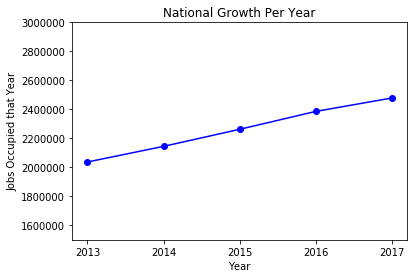

In [28]:
plt.plot(df['Year'],df['Total_emp_year'], color='blue', marker='o')
plt.ylim([1500000, 3000000])
plt.title('National Growth Per Year')
plt.xlabel('Year')
plt.ylabel('Jobs Occupied that Year')
plt.show()

In [29]:
pre_dict={"Year":[2013, 2014, 2015, 2016, 2017, 2026],
         'Total_Emp_Year':[2036710,2144490,2262160,2385610, 2478120, 2700000]}

pre_dict_df = pd.DataFrame.from_dict(pre_dict)
pre_dict_df

Total_Emp_Year  Year
0         2036710  2013
1         2144490  2014
2         2262160  2015
3         2385610  2016
4         2478120  2017
5         2700000  2026

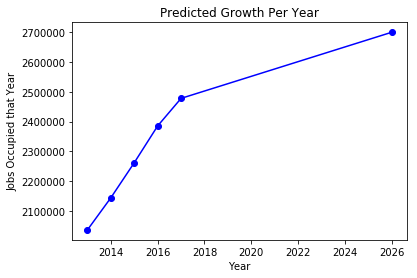

In [30]:
plt.plot(pre_dict_df['Year'],pre_dict_df['Total_Emp_Year'], color='blue', marker='o')
#plt.ylim([1500000, 3000000])

plt.title('Predicted Growth Per Year')
plt.xlabel('Year')
plt.ylabel('Jobs Occupied that Year')
plt.show()

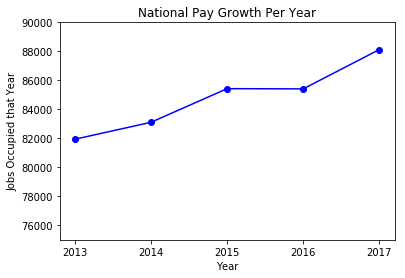

In [31]:
plt.plot(df['Year'],df['Average Annual Pay'], color='blue', marker='o')
plt.ylim([75000, 90000])
plt.title('National Pay Growth Per Year')
plt.xlabel('Year')
plt.ylabel('Jobs Occupied that Year')
plt.show()

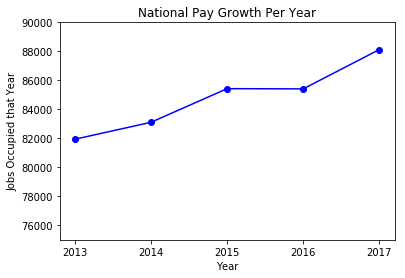

In [32]:
plt.plot(df['Year'],df['Average Annual Pay'], color='blue', marker='o')

plt.ylim([75000, 90000])
plt.title('National Pay Growth Per Year')
plt.xlabel('Year')
plt.ylabel('Jobs Occupied that Year')
plt.show()

In [33]:
state_annual_avg_df

sorted_df = state_annual_avg_df.nlargest(5, 'Average Pay_2017')
sort_NC = pd.DataFrame(state_annual_avg_df.iloc[33])
sort_NC

33
Average Pay_2013        71568.75
Average Pay_2014        71568.75
Average Pay_2015        71568.75
Average Pay_2016        71568.75
Average Pay_2017        71568.75
State             North Carolina

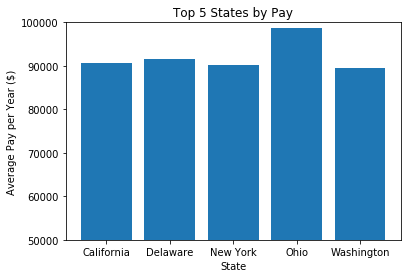

In [34]:
plt.bar(sorted_df['State'], sorted_df['Average Pay_2017'], align='center')
plt.title('Top 5 States by Pay')
plt.xlabel('State')
plt.ylabel('Average Pay per Year ($)')
plt.ylim(50000, 100000)
plt.show()

In [35]:
sorting_df = state_annual_avg_df.sort_values('Average Pay_2017', ascending=False)
sorting_df.head()

Average Pay_2013  Average Pay_2014  Average Pay_2015  Average Pay_2016  \
35          98665.56          98665.56          98665.56          98665.56   
7           91683.33          91683.33          91683.33          91683.33   
4           90648.89          90648.89          90648.89          90648.89   
32          90240.00          90240.00          90240.00          90240.00   
47          89558.89          89558.89          89558.89          89558.89   

    Average Pay_2017       State  
35          98665.56        Ohio  
7           91683.33    Delaware  
4           90648.89  California  
32          90240.00    New York  
47          89558.89  Washington

In [36]:
worst_states = state_annual_avg_df.nsmallest(5, 'Average Pay_2017')

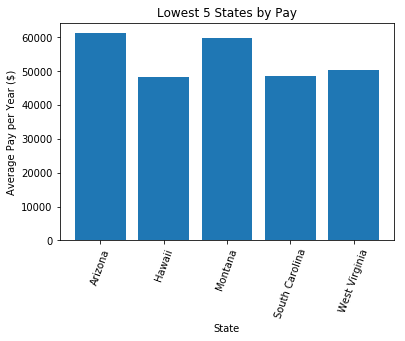

In [37]:
plt.bar(worst_states['State'], worst_states['Average Pay_2017'], align='center')
plt.xticks(rotation=70)
plt.title('Lowest 5 States by Pay')
plt.xlabel('State')
plt.ylabel('Average Pay per Year ($)')
plt.show()

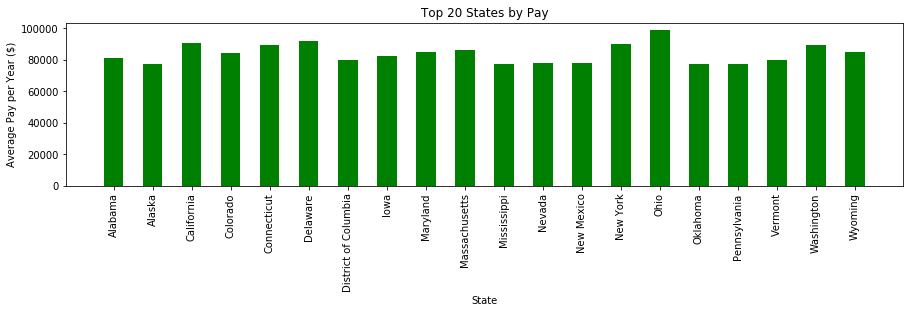

In [38]:
large_comp = state_annual_avg_df.nlargest(20, 'Average Pay_2017')
plt.figure(figsize=(15, 3))
plt.bar(large_comp['State'], large_comp["Average Pay_2017"], align='center', width=0.5, color='green')
plt.title('Top 20 States by Pay')
plt.xlabel('State')
plt.ylabel('Average Pay per Year ($)')
plt.xticks(rotation='vertical')
#plt.ylim(50000, 100000)
plt.show()

In [39]:
small_comp = state_annual_avg_df.nsmallest(20, 'Average Pay_2017')
small_comp = small_comp.sort_values(['Average Pay_2017'], ascending=False)
plt.figure(figsize=(15, 3))
plt.bar(small_comp['State'], small_comp["Average Pay_2017"], align='center', width=0.5, color='coral')
plt.xticks(rotation='vertical')
plt.title('Bottom 20 States by Pay')
plt.xlabel('State')
plt.ylabel('Average Pay per Year ($)')
#plt.ylim(35000, 75000)
plt.show()

In [40]:
datajob= pd.read_csv(datajob_csv)
datajob.head(1)

ID   AREA_NAME        City    Geography OCC_CODE            OCC_TITLE  \
0  10500  Albany, GA  Albany, GA  Albany, GA   13-1111  Management Analysts   

  OCC_GROUP  TOT_EMP EMP_PRSE JOBS_1000  ...   H_MEDIAN H_PCT75  H_PCT90  \
0  detailed   190.00      7.6     3.328  ...      34.19   41.96    52.77   

  A_PCT10 A_PCT25 A_MEDIAN A_PCT75  A_PCT90 ANNUAL HOURLY  
0  50,220  58,950 71110.00  87,270  109,770    nan    nan  

[1 rows x 26 columns]

In [41]:
del pop_df['Id']
pop_df= pop_df.rename(columns={"Target Geo Id2": "ID", "Geography.2": "City",
                              "Population Estimate (as of July 1) - 2016":"Population"})
pop_df.head(1)

Id2      Geography   Target Geo Id       ID                   Geography.1  \
0  nan  United States  310M300US10180 10180.00  United States - Abilene, TX    

           City  April 1, 2010 - Census  April 1, 2010 - Estimates Base  \
0  Abilene, TX                   165252                          165248   

   Population Estimate (as of July 1) - 2010  \
0                                     165583   

   Population Estimate (as of July 1) - 2011  \
0                                     166633   

   Population Estimate (as of July 1) - 2012  \
0                                     167452   

   Population Estimate (as of July 1) - 2013  \
0                                     167426   

   Population Estimate (as of July 1) - 2014  \
0                                     168143   

   Population Estimate (as of July 1) - 2015  Population  \
0                                     169478      169733   

   Population Estimate (as of July 1) - 2017  
0                                     170219

In [42]:
#reading Dataframe to ensure columns and datatypes are correct
income_df= income_df.rename(columns={"Households; Estimate; Mean income (dollars)": "Household Income (Avg)",
                                     "Households; Estimate; Median income (dollars)":"Household Income (Median)",
                                     "Id": "Code","Id2":"ID" })
income_df.head(1)

Code     ID      Geography  Households; Estimate; Total  \
0  310M300US10140  10140  Aberdeen, WA                         27330   

   Households; Margin of Error; Total  Families; Estimate; Total  \
0                                1573                      17626   

   Families; Margin of Error; Total Married-couple families; Estimate; Total  \
0                              1813                                        N   

  Married-couple families; Margin of Error; Total  \
0                                               N   

  Nonfamily households; Estimate; Total  \
0                                  9704   

                                         ...                                         \
0                                        ...                                          

  Nonfamily households; Margin of Error; Median income (dollars)  \
0                                               6289               

   Household Income (Avg)  Households; Margin of Error; Mean income (dollars)  \
0                   67813                                               7818    

   Families; Estimate; Mean income (dollars)  \
0                                      73484   

   Families; Margin of Error; Mean income (dollars)  \
0                                              8484   

   Married-couple families; Estimate; Mean income (dollars)  \
0                                                  N          

   Married-couple families; Margin of Error; Mean income (dollars)  \
0                                                  N                 

   Nonfamily households; Estimate; Mean income (dollars)  \
0                                              52123       

   Nonfamily households; Margin of Error; Mean income (dollars)  \
0                                              16241              

   Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months  
0                                              46.00                                 

[1 rows x 28 columns]

In [43]:
#merging city job data with census population data
merge1= pd.merge(datajob, pop_df, on="ID")
merge1.head()

ID   AREA_NAME      City_x  Geography_x OCC_CODE  \
0  10500  Albany, GA  Albany, GA  Albany, GA   13-1111   
1  10500  Albany, GA  Albany, GA  Albany, GA   13-1161   
2  10500  Albany, GA  Albany, GA  Albany, GA   15-1121   
3  11180    Ames, IA    Ames, IA    Ames, IA   13-1111   
4  11180    Ames, IA    Ames, IA    Ames, IA   13-1161   

                                           OCC_TITLE OCC_GROUP  TOT_EMP  \
0                                Management Analysts  detailed   190.00   
1  Market Research Analysts and Marketing Special...  detailed    80.00   
2                          Computer Systems Analysts  detailed    50.00   
3                                Management Analysts  detailed   120.00   
4  Market Research Analysts and Marketing Special...  detailed   120.00   

  EMP_PRSE JOBS_1000                    ...                     \
0      7.6     3.328                    ...                      
1     19.4     1.437                    ...                      
2     15.3     0.807                    ...                      
3     14.6     2.719                    ...                      
4     16.5     2.735                    ...                      

  April 1, 2010 - Census April 1, 2010 - Estimates Base  \
0                 157308                         157500   
1                 157308                         157500   
2                 157308                         157500   
3                  89542                          89542   
4                  89542                          89542   

   Population Estimate (as of July 1) - 2010  \
0                                     157596   
1                                     157596   
2                                     157596   
3                                      89627   
4                                      89627   

  Population Estimate (as of July 1) - 2011  \
0                                    157875   
1                                    157875   
2                                    157875   
3                                     90797   
4                                     90797   

  Population Estimate (as of July 1) - 2012  \
0                                    157369   
1                                    157369   
2                                    157369   
3                                     91730   
4                                     91730   

  Population Estimate (as of July 1) - 2013  \
0                                    156025   
1                                    156025   
2                                    156025   
3                                     93462   
4                                     93462   

  Population Estimate (as of July 1) - 2014  \
0                                    155293   
1                                    155293   
2                                    155293   
3                                     95310   
4                                     95310   

  Population Estimate (as of July 1) - 2015 Population  \
0                                    153686     152440   
1                                    153686     152440   
2                                    153686     152440   
3                                     96348      96816   
4                                     96348      96816   

  Population Estimate (as of July 1) - 2017  
0                                    151434  
1                                    151434  
2                                    151434  
3                                     97502  
4                                     97502  

[5 rows x 41 columns]

In [44]:
#merging city job data/population data census city income data
cities_all = pd.merge(merge1, income_df, on="ID")
cities_all.head(1)

ID   AREA_NAME      City_x  Geography_x OCC_CODE            OCC_TITLE  \
0  10500  Albany, GA  Albany, GA  Albany, GA   13-1111  Management Analysts   

  OCC_GROUP  TOT_EMP EMP_PRSE JOBS_1000  \
0  detailed   190.00      7.6     3.328   

                                        ...                                         \
0                                       ...                                          

  Nonfamily households; Margin of Error; Median income (dollars)  \
0                                               5043               

  Household Income (Avg)  Households; Margin of Error; Mean income (dollars)  \
0                  57901                                               4309    

  Families; Estimate; Mean income (dollars)  \
0                                     65534   

  Families; Margin of Error; Mean income (dollars)  \
0                                             6088   

  Married-couple families; Estimate; Mean income (dollars)  \
0                                              88467         

  Married-couple families; Margin of Error; Mean income (dollars)  \
0                                               8800                

  Nonfamily households; Estimate; Mean income (dollars)  \
0                                              40065      

  Nonfamily households; Margin of Error; Mean income (dollars)  \
0                                               5605             

  Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months  
0                                              41.80                                

[1 rows x 68 columns]

In [45]:
#formatting dataframe for calculations
cities_all= cities_all[["ID","Geography","AREA_NAME","Population","TOT_EMP",
                        "A_MEAN","Household Income (Avg)","Household Income (Median)"]]
cities_all= cities_all.rename(columns={"AREA_NAME": "City", "TOT_EMP": "Number of Jobs",
                               "A_MEAN":"Job Wage (Avg)","Household Income (Avg)":"Income"})
cities_all.head()

ID    Geography        City  Population  Number of Jobs  Job Wage (Avg)  \
0  10500  Albany, GA   Albany, GA      152440          190.00        83420.00   
1  10500  Albany, GA   Albany, GA      152440           80.00        53470.00   
2  10500  Albany, GA   Albany, GA      152440           50.00        63460.00   
3  11180    Ames, IA     Ames, IA       96816          120.00        74170.00   
4  11180    Ames, IA     Ames, IA       96816          120.00        61300.00   

   Income  Household Income (Median)  
0   57901                      40667  
1   57901                      40667  
2   57901                      40667  
3   70682                      53371  
4   70682                      53371

In [46]:
#calculations for each city 

#Total Number of Jobs
city_groupby = cities_all.groupby('City')
num_jobs = city_groupby["Number of Jobs"].sum()
#Job Wage (Avg)
avg_wage = city_groupby['Job Wage (Avg)'].mean()

In [47]:
#creating new dataframe with all grouby calculations completed
city_calc= pd.DataFrame({'Job Wage (Avg)': avg_wage, 'Number of Jobs': num_jobs})
city_calc['ID']= cities_all.ID.unique()
city_calc['Population']= cities_all.Population.unique()
city_calc['Household Income (Avg)']= ""
city_calc.to_csv("All_City_Data.csv")

In [48]:
data['Job Wage Ratio'] = data['Job Wage (Avg)']/data['Household Income (Avg)']
per_capita = data['Population']/10000
data['Jobs Per Capita'] = data['Number of Jobs']/per_capita

In [49]:
#creating scores dataframe to sort data dataframe multiple ways to get different scores information 

#Wage Ratio Score
wage_scores= data.sort_values("Job Wage Ratio", ascending=False)
wage_scores['Wage Ratio Rank'] = np.arange(1,121)
wage_scores.head()

ID                      City  Job Wage (Avg)  Number of Jobs  \
88   39460           Punta Gorda, FL        96715.00             140   
76   36100                 Ocala, FL        77635.00             480   
27   19180              Danville, IL        79390.00              90   
26   19140                Dalton, GA        80120.00             540   
103  43420  Sierra Vista-Douglas, AZ        72396.67            1050   

     Population  Household Income (Avg)  Job Wage Ratio  Jobs Per Capita  \
88       178157                   65643            1.47             7.86   
76       348139                   54181            1.43            13.79   
27        78560                   56819            1.40            11.46   
26       144074                   57870            1.38            37.48   
103      125355                   55174            1.31            83.76   

     Wage Ratio Rank  
88                 1  
76                 2  
27                 3  
26                 4  
103                5

In [50]:
#Jobs per capita score
jobs_percapita_scores = data.sort_values("Jobs Per Capita",ascending=False)
jobs_percapita_scores['Jobs Per Capita Rank']= np.arange(1,121)
jobs_percapita_scores.head()

ID                                     City  Job Wage (Avg)  \
106  45220                          Tallahassee, FL        60561.43   
11   14010                          Bloomington, IL        77565.00   
95   41940       San Jose-Sunnyvale-Santa Clara, CA       109998.75   
92   40900  Sacramento--Roseville--Arden-Arcade, CA        79155.00   
34   19780           Des Moines-West Des Moines, IA        76255.00   

     Number of Jobs  Population  Household Income (Avg)  Job Wage Ratio  \
106            7000      379047                   68357            0.89   
11             3090      188847                   81223            0.95   
95            32540     1990910                  145317            0.76   
92            33750     2295233                   88802            0.89   
34             9020      634740                   85195            0.90   

     Jobs Per Capita  Jobs Per Capita Rank  
106           184.67                     1  
11            163.62                     2  
95            163.44                     3  
92            147.04                     4  
34            142.11                     5

In [51]:
#highest avg job wage dataframe
max_wage= data.sort_values("Job Wage (Avg)", ascending=False)
max_wage['Avg Wage Rank'] = np.arange(1,121)
max_wage.head()

ID                                City  Job Wage (Avg)  Number of Jobs  \
95  41940  San Jose-Sunnyvale-Santa Clara, CA       109998.75           32540   
88  39460                     Punta Gorda, FL        96715.00             140   
2   31080       Anaheim-Santa Ana-Irvine, CA         91886.25           35420   
71  34900                            Napa, CA        90797.50             620   
55  26620                      Huntsville, AL        89672.86            5230   

    Population  Household Income (Avg)  Job Wage Ratio  Jobs Per Capita  \
95     1990910                  145317            0.76           163.44   
88      178157                   65643            1.47             7.86   
2     13328261                   95358            0.96            26.58   
71      141649                  106368            0.85            43.77   
55      449232                   82195            1.09           116.42   

    Avg Wage Rank  
95              1  
88              2  
2               3  
71              4  
55              5

In [52]:
#highest number of jobs dataframe
max_job= data.sort_values("Number of Jobs", ascending=False)
max_job['# of Jobs Rank'] = np.arange(1,121)
max_job.head()

ID                                       City  Job Wage (Avg)  \
20  16980  Chicago-Naperville-Arlington Heights, IL         74157.78   
6   12060          Atlanta-Sandy Springs-Roswell, GA        78686.67   
82  38060                Phoenix-Mesa-Scottsdale, AZ        66930.00   
2   31080              Anaheim-Santa Ana-Irvine, CA         91886.25   
92  40900    Sacramento--Roseville--Arden-Arcade, CA        79155.00   

    Number of Jobs  Population  Household Income (Avg)  Job Wage Ratio  \
20           82500     9546326                   91509            0.81   
6            60090     5795723                   86546            0.91   
82           38260     4648498                   80235            0.83   
2            35420    13328261                   95358            0.96   
92           33750     2295233                   88802            0.89   

    Jobs Per Capita  # of Jobs Rank  
20            86.42               1  
6            103.68               2  
82            82.31               3  
2             26.58               4  
92           147.04               5

In [53]:
data['Avg Wage Rank'] = max_wage['Avg Wage Rank']
data['Jobs Per Capita Rank'] = jobs_percapita_scores['Jobs Per Capita Rank']
data['Wage Ratio Rank'] = wage_scores['Wage Ratio Rank']
data['# of Jobs Rank']=max_job['# of Jobs Rank']

data.head()

ID                              City  Job Wage (Avg)  Number of Jobs  \
0  10500                        Albany, GA        66783.33             320   
1  11180                          Ames, IA        69296.67             600   
2  31080     Anaheim-Santa Ana-Irvine, CA         91886.25           35420   
3  11260                     Anchorage, AK        84437.14            1840   
4  11500  Anniston-Oxford-Jacksonville, AL        59123.33             140   

   Population  Household Income (Avg)  Job Wage Ratio  Jobs Per Capita  \
0      152440                   57901            1.15            20.99   
1       96816                   70682            0.98            61.97   
2    13328261                   95358            0.96            26.58   
3      401499                  102233            0.83            45.83   
4      114980                   58992            1.00            12.18   

   Avg Wage Rank  Jobs Per Capita Rank  Wage Ratio Rank  # of Jobs Rank  
0             87                    78               14              88  
1             74                    23               63              69  
2              3                    64               69               4  
3             17                    37              107              38  
4            109                   101               58             105

In [54]:
#total cityscore dataframe
data["Total City Score"]= data['Avg Wage Rank']+ data['Jobs Per Capita Rank']+ data['Wage Ratio Rank']+ data['# of Jobs Rank']
city_score= data.sort_values("Total City Score", ascending=True)
city_score.head(20)

ID                                      City  Job Wage (Avg)  \
55   26620                            Huntsville, AL        89672.86   
23   17820                      Colorado Springs, CO        86667.50   
52   25540  Hartford-West Hartford-East Hartford, CT        89456.25   
79   37340         Palm Bay-Melbourne-Titusville, FL        79081.43   
33   19740                Denver-Aurora-Lakewood, CO        88827.50   
94   41740                    San Diego-Carlsbad, CA        89126.25   
10   13820                     Birmingham-Hoover, AL        79627.78   
95   41940        San Jose-Sunnyvale-Santa Clara, CA       109998.75   
9    12540                           Bakersfield, CA        82796.25   
109  46060                                Tucson, AZ        74457.14   
103  43420                  Sierra Vista-Douglas, AZ        72396.67   
92   40900   Sacramento--Roseville--Arden-Arcade, CA        79155.00   
6    12060         Atlanta-Sandy Springs-Roswell, GA        78686.67   
77   36740             Orlando-Kissimmee-Sanford, FL        74745.56   
2    31080             Anaheim-Santa Ana-Irvine, CA         91886.25   
11   14010                           Bloomington, IL        77565.00   
25   18880    Crestview-Fort Walton Beach-Destin, FL        77318.57   
14   14860           Bridgeport-Stamford-Norwalk, CT        84940.00   
26   19140                                Dalton, GA        80120.00   
115  47580                         Warner Robins, GA        77821.67   

     Number of Jobs  Population  Household Income (Avg)  Job Wage Ratio  \
55             5230      449232                   82195            1.09   
23             4690      710746                   80759            1.07   
52            13890     1210075                   96040            0.93   
79             3100      577899                   70367            1.12   
33            28440     2851848                   97172            0.91   
94            27580     3317200                   96692            0.92   
10             5820     1146888                   74082            1.07   
95            32540     1990910                  145317            0.76   
9              2630      885086                   67594            1.22   
109            4320     1012519                   65881            1.13   
103            1050      125355                   55174            1.31   
92            33750     2295233                   88802            0.89   
6             60090     5795723                   86546            0.91   
77            12680     2453333                   71881            1.04   
2             35420    13328261                   95358            0.96   
11             3090      188847                   81223            0.95   
25             2140      265355                   77360            1.00   
14            11380      949191                  143628            0.59   
26              540      144074                   57870            1.38   
115             890      190068                   69914            1.11   

     Jobs Per Capita  Avg Wage Rank  Jobs Per Capita Rank  Wage Ratio Rank  \
55            116.42              5                     8               31   
23             65.99             13                    21               39   
52            114.79              6                     9               85   
79             53.64             33                    27               21   
33             99.72              8                    11               89   
94             83.14              7                    14               87   
10             50.75             30                    30               38   
95            163.44              1                     3              115   
9              29.71             23                    60               10   
109            42.67             50                    40               17   
103            83.76             59                    13    

In [55]:
#city_score=city_score.reset_index()
#del city_score['index']
city_score.head()

ID                                      City  Job Wage (Avg)  \
55  26620                            Huntsville, AL        89672.86   
23  17820                      Colorado Springs, CO        86667.50   
52  25540  Hartford-West Hartford-East Hartford, CT        89456.25   
79  37340         Palm Bay-Melbourne-Titusville, FL        79081.43   
33  19740                Denver-Aurora-Lakewood, CO        88827.50   

    Number of Jobs  Population  Household Income (Avg)  Job Wage Ratio  \
55            5230      449232                   82195            1.09   
23            4690      710746                   80759            1.07   
52           13890     1210075                   96040            0.93   
79            3100      577899                   70367            1.12   
33           28440     2851848                   97172            0.91   

    Jobs Per Capita  Avg Wage Rank  Jobs Per Capita Rank  Wage Ratio Rank  \
55           116.42              5                     8               31   
23            65.99             13                    21               39   
52           114.79              6                     9               85   
79            53.64             33                    27               21   
33            99.72              8                    11               89   

    # of Jobs Rank  Total City Score  
55              20                64  
23              23                96  
52              10               110  
79              29               110  
33               7               115

In [56]:
city_score=city_score['Job Wage (Avg)'].map("{:,.0f}".format)
city_score.head()

55    89,673
23    86,668
52    89,456
79    79,081
33    88,828
Name: Job Wage (Avg), dtype: object

In [57]:
top10= city_score.head(10)
top10

55      89,673
23      86,668
52      89,456
79      79,081
33      88,828
94      89,126
10      79,628
95     109,999
9       82,796
109     74,457
Name: Job Wage (Avg), dtype: object